In [2]:
# Import our dependencies
import pandas as pd
import sklearn as skl


# Read in our ramen data
lrg_cty_df = pd.read_csv("200_LRG_cty_population.csv")
# Read in our ramen data
lrg_cty_df
# # Print out the Country value counts
# country_counts = ramen_df.Country.value_counts()
# country_counts

,rank,usps,pop2020,pop2010,change,density,aland
0,1,NY,8323340,8190360,0.0162,10698.6142,777983000
1,2,CA,4015940,3795370,0.0581,3306.4162,1214590000
2,3,IL,2694240,2697530,-0.0012,4575.1780,588882000
3,4,TX,2340890,2098450,0.1155,1411.7991,1658090000
4,5,AZ,1703080,1449300,0.1751,1270.2253,1340770000
...,...,...,...,...,...,...,...
195,196,FL,143219,122299,0.1711,1916.5245,74728500
196,197,CT,143010,144858,-0.0128,3437.1868,41606700
197,198,KS,142841,126249,0.1314,894.7078,159651000
198,199,TX,142173,117058,0.2146,570.4032,249250000


In [3]:
lrg_cty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   rank     200 non-null    int64  
 1   usps     200 non-null    object 
 2   pop2020  200 non-null    int64  
 3   pop2010  200 non-null    int64  
 4   change   200 non-null    float64
 5   density  200 non-null    float64
 6   aland    200 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 11.1+ KB


In [4]:
lrg_cty_df.describe()

,rank,pop2020,pop2010,change,density,aland
count,200.000000,2.000000e+02,2.000000e+02,200.000000,200.000000,2.000000e+02
mean,100.500000,4.167849e+05,3.834802e+05,0.100763,1725.839217,3.210183e+08
std,57.879185,7.109677e+05,6.864910e+05,0.113267,1385.980001,4.195531e+08
min,1.000000,1.420490e+05,1.084810e+05,-0.132900,64.614500,2.179010e+07
25%,50.750000,1.796832e+05,1.638582e+05,0.021500,898.179000,1.175988e+08
50%,100.500000,2.319290e+05,2.101525e+05,0.096750,1407.570400,2.009300e+08
75%,150.250000,3.901542e+05,3.700848e+05,0.143525,1966.141675,3.580465e+08
max,200.000000,8.323340e+06,8.190360e+06,0.819600,10698.614200,4.420590e+09


##Questions we would like to answer are:
###Given the data available, can we expect housing prices to increase or decrease in the coming years? 
- need to make predicition with some kind of regression 
###What is the current income distribution of housing prices in a given city?
-- unclear about this 
###What are the top industries in a given city?
-- need data on job titles 
###What are general population demographics of a given city?
- have we gotten any of this yet? 
###What is the breakdown of renters vs. buyers in a city, and how has it changed over time? 
###How has income changed over time?
###How have housing prices changed over time?

In [5]:
## finding how many nulls are in there to be able to drop those rows 
for column in lrg_cty_df.columns:
    print(f"column {column} has {lrg_cty_df[column].isnull().sum()} null values")

column rank has 0 null values
column usps has 0 null values
column pop2020 has 0 null values
column pop2010 has 0 null values
column change has 0 null values
column density has 0 null values
column aland has 0 null values


In [ ]:
# # to pull down csv when cleaned 
# output_file_path = "<path to folder>/new_iris_data.csv"
# new_iris_df.to_csv(output_file_path, index=False)

In [6]:
lrg_cty_df.columns

Index(['rank', 'usps', 'pop2020', 'pop2010', 'change', 'density', 'aland'], dtype='object')

In [7]:
lrg_cty_df.dtypes

rank         int64
usps        object
pop2020      int64
pop2010      int64
change     float64
density    float64
aland        int64
dtype: object

In [8]:
lrg_cty_df.head()

,rank,usps,pop2020,pop2010,change,density,aland
0,1,NY,8323340,8190360,0.0162,10698.6142,777983000
1,2,CA,4015940,3795370,0.0581,3306.4162,1214590000
2,3,IL,2694240,2697530,-0.0012,4575.1780,588882000
3,4,TX,2340890,2098450,0.1155,1411.7991,1658090000
4,5,AZ,1703080,1449300,0.1751,1270.2253,1340770000


In [16]:
# df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'}, 
# inplace=True)

lrg_cty_df.rename(columns={'Area':'Area(km^2)'},inplace=True)

In [17]:
lrg_cty_df.head()

,rank,usps,pop2020,pop2010,change,density,Area(km^2)
0,1,NY,8323340,8190360,0.0162,10698.6142,777983000
1,2,CA,4015940,3795370,0.0581,3306.4162,1214590000
2,3,IL,2694240,2697530,-0.0012,4575.1780,588882000
3,4,TX,2340890,2098450,0.1155,1411.7991,1658090000
4,5,AZ,1703080,1449300,0.1751,1270.2253,1340770000


In [ ]:
# charity_df = charity_df.set_index("EIN")
# charity_df.head()

# #remove ein name from index to be used for all df needed to be split or recreated 

# charity_df.index.name = None
# charity_df.head()

lrg_cty_df = lrg_cty_df.set_index("rank")

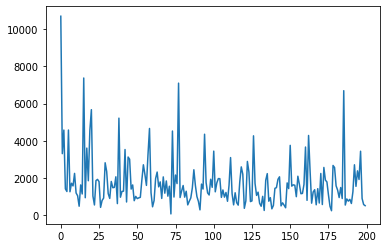

In [18]:
# counts_app_type.plot.density()
lrg_cty_df["density"].plot()

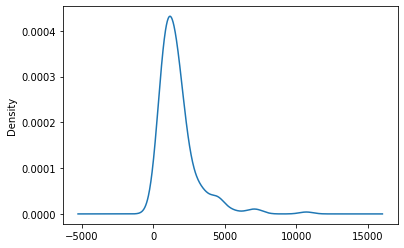

In [21]:
lrg_cty_df["density"].plot.density()

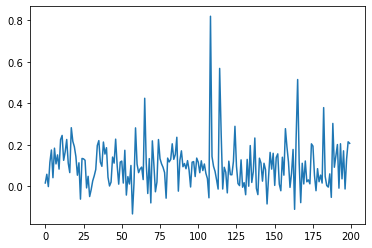

In [19]:
lrg_cty_df["change"].plot()

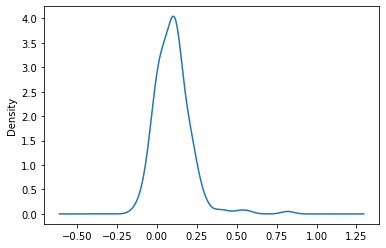

In [20]:
lrg_cty_df["change"].plot.density()

In [22]:
cty_names_df = pd.DataFrame(lrg_cty_df[['rank','usps']])
cty_names_df.head()

,rank,usps
0,1,NY
1,2,CA
2,3,IL
3,4,TX
4,5,AZ


In [23]:
lrg_cty_df.drop(lrg_cty_df['rank','usps'])
lrg_cty_df.head()

KeyError: ('rank', 'usps')